In [5]:
import pandas as pd
# Importando os arquivos

vendas_df=pd.read_csv (r'Contoso - Vendas - 2017.csv',sep=';')
produtos_df =pd.read_csv (r'Contoso - Cadastro Produtos.csv',sep=';')
lojas_df =pd.read_csv (r'Contoso - Lojas.csv',sep=';')
clientes_df= pd.read_csv (r'Contoso - Clientes.csv',sep=';')

# Selecionar as colunas que serão uteis para minha analise

produtos_df = produtos_df[['ID Produto','Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]
clientes_df = clientes_df[['ID Cliente','E-mail']]

# Agora irei mesclar as colunas e criar assim um novo Dataframe, como o codigo "merge",
# É importante observar os nomes das colunas que fazem relação com a base de vendas, precisa ter o mesmo nome.
# Vou mudar o nome da coluna "E-mail", pois ficou algo muito abragente, não sei de que é esse e-mail, se é do cliente ou loja.

vendas_df=vendas_df.merge(produtos_df,on='ID Produto')
vendas_df=vendas_df.merge(lojas_df,on='ID Loja')
vendas_df=vendas_df.merge(clientes_df,on='ID Cliente').rename(columns={'E-mail':'E-mail do Cliente'})

display (vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Contoso Bluetooth Notebook Mouse E70 Silver,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Contoso Expandable 3-Handset Cordless Phone Sy...,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Contoso Home Theater System 4.1 Channel M1400 ...,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Contoso Dual USB Power Adapter - power adapter...,Loja Contoso New York No.1,anne5@adventure-works.com


karen33@adventure-works.com       77
chloe77@adventure-works.com       74
julia43@adventure-works.com       69
destiny66@adventure-works.com     68
gilbert9@adventure-works.com      68
                                  ..
isabella51@adventure-works.com     1
wdalescoci@pbs.org                 1
kbroggelliin@rakuten.co.jp         1
connor15@adventure-works.com       1
ekorneevmm@instagram.com           1
Name: E-mail do Cliente, Length: 38907, dtype: int64

<AxesSubplot:>

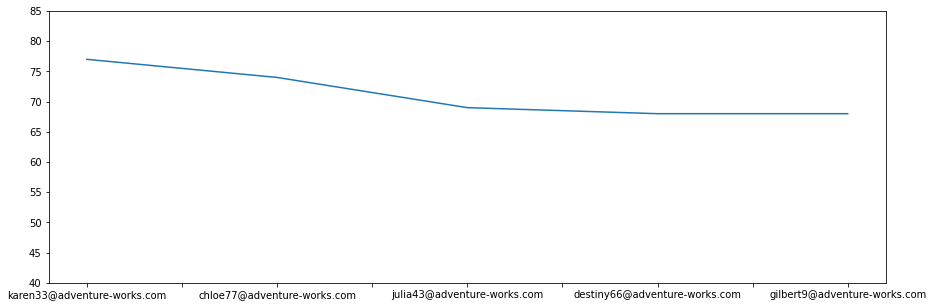

In [16]:
# 1° Qual cliente que comprou mais vezes ?

frequencia_clientes= vendas_df['E-mail do Cliente'].value_counts()
display(frequencia_clientes)
frequencia_clientes[:5].plot(figsize=(15,5), yticks=range(40,90,5))

In [18]:
# 2° Qual a loja que mais vendeu?
# Vou precisar agrupar os valores das lojas, para que eu possa saber quanto cada loja vendeu. 
#E filtrar as colunas que me interessa, neste caso seria o nome da loja que será meu indice e a quantidade vendida

vendas_lojas= vendas_df.groupby('Nome da Loja').sum()
vendas_lojas= vendas_lojas[['Quantidade Vendida']]
display(vendas_lojas)

,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065
...,...
Loja Contoso Yokohama,28023
Loja Contoso York,27164
Loja Contoso koln No.1,29046


,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117
Loja Contoso North America Online,701961
Loja Contoso Europe Online,616845
Loja Contoso Asia Online,578458
Loja Contoso North America Reseller,520176
...,...
Loja Contoso Berlin,379
Loja Contoso Paterson,371
Loja Contoso Marseille,370


<AxesSubplot:xlabel='Nome da Loja'>

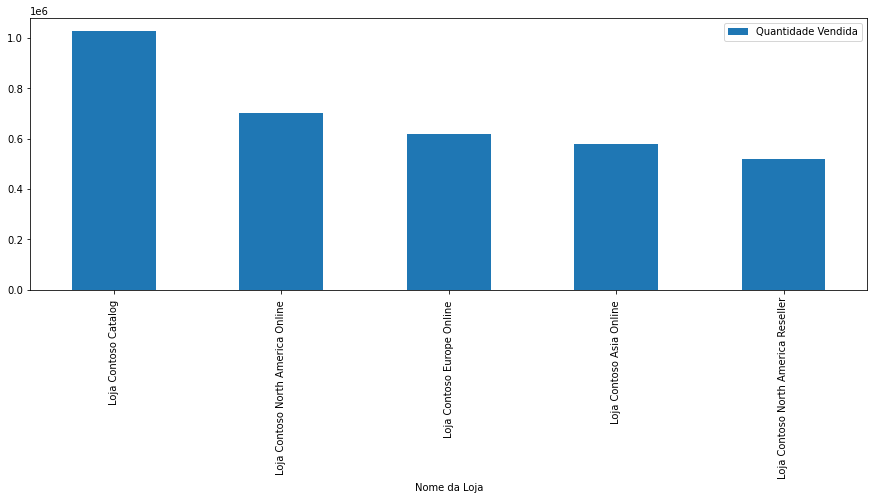

In [22]:
# Vou ordenar do maior para o menor
vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida',ascending = False)
display(vendas_lojas)
# Plotar um grafico
vendas_lojas[:5].plot(figsize=(15,5),kind='bar')

In [23]:
# Printando apenas a loja que mais vendeu e o valor da venda
maior_valor=vendas_lojas['Quantidade Vendida'].max()
melhor_loja=vendas_lojas['Quantidade Vendida'].idxmax()
print(melhor_loja,maior_valor)

Loja Contoso Catalog  1029117
